## Customer Segmentation and Churn Prediction for a Telco Company

In [1]:
# suppress warning

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraires

import numpy as np
import pandas as pd

In [3]:
## Importing libraries for visuals

import seaborn as sns ; sns.set(color_codes=True)
import matplotlib.pyplot as plt  
%matplotlib inline

In [4]:
import plotly.express as px
import plotly.graph_objects as go

## 1. Data Collection & Exploration

In [5]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
df.head()

Unnamed: 0  customerID  gender SeniorCitizen          Partner  \
0           0  7590-VHVEG  Female        Junior     With Partner   
1           1  5575-GNVDE    Male        Junior  Without Partner   
2           2  3668-QPYBK    Male        Junior  Without Partner   
3           3  7795-CFOCW    Male        Junior  Without Partner   
4           4  9237-HQITU  Female        Junior  Without Partner   

           Dependents  tenure PhoneService     MultipleLines InternetService  \
0  Without Dependents       1           No  No phone service             DSL   
1  Without Dependents      34          Yes                No             DSL   
2  Without Dependents       2          Yes                No             DSL   
3  Without Dependents      45           No  No phone service             DSL   
4  Without Dependents       2          Yes                No     Fiber optic   

   ... StreamingMovies        Contract   PaperlessBilling  \
0  ...              No  Month-to-month  Paperless Billing   
1  ...              No        One year      Paper Billing   
2  ...              No  Month-to-month  Paperless Billing   
3  ...              No        One year      Paper Billing   
4  ...              No  Month-to-month  Paperless Billing   

               PaymentMethod MonthlyCharges TotalCharges Churn  \
0           Electronic check          29.85        29.85    No   
1               Mailed check          56.95      1889.50    No   
2               Mailed check          53.85       108.15   Yes   
3  Bank transfer (automatic)          42.30      1840.75    No   
4           Electronic check          70.70       151.65   Yes   

  MonthlyChargesGroup No. of Services              PartnerDependents  
0   B. 20 => 30 Euros               1              With Partner only  
1   E. 50 => 60 Euros               2  Without Partner or Dependents  
2   E. 50 => 60 Euros               2  Without Partner or Dependents  
3   D. 40 => 50 Euros               3  Without Partner or Dependents  
4   G. 70 => 80 Euros               0  Without Partner or Dependents  

[5 rows x 25 columns]

In [7]:
df.shape

(7043, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7043 non-null   int64  
 1   customerID           7043 non-null   object 
 2   gender               7043 non-null   object 
 3   SeniorCitizen        7043 non-null   object 
 4   Partner              7043 non-null   object 
 5   Dependents           7043 non-null   object 
 6   tenure               7043 non-null   int64  
 7   PhoneService         7043 non-null   object 
 8   MultipleLines        7043 non-null   object 
 9   InternetService      7043 non-null   object 
 10  OnlineSecurity       7043 non-null   object 
 11  OnlineBackup         7043 non-null   object 
 12  DeviceProtection     7043 non-null   object 
 13  TechSupport          7043 non-null   object 
 14  StreamingTV          7043 non-null   object 
 15  StreamingMovies      7043 non-null   o

In [9]:
df.isnull().sum()

Unnamed: 0              0
customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges           11
Churn                   0
MonthlyChargesGroup     0
No. of Services         0
PartnerDependents       0
dtype: int64

In [10]:
df.describe()

Unnamed: 0       tenure  MonthlyCharges  TotalCharges  No. of Services
count  7043.000000  7043.000000     7043.000000   7032.000000      7043.000000
mean   3521.000000    32.371149       64.761692   2283.300441         2.037910
std    2033.283305    24.559481       30.090047   2266.771362         1.847682
min       0.000000     0.000000       18.250000     18.800000         0.000000
25%    1760.500000     9.000000       35.500000    401.450000         0.000000
50%    3521.000000    29.000000       70.350000   1397.475000         2.000000
75%    5281.500000    55.000000       89.850000   3794.737500         3.000000
max    7042.000000    72.000000      118.750000   8684.800000         6.000000

## 2. Data Preprocessing

### Handling Missing value

In [11]:
(df.isnull().mean()*100).sort_values(ascending=False)

TotalCharges           0.156183
Unnamed: 0             0.000000
TechSupport            0.000000
No. of Services        0.000000
MonthlyChargesGroup    0.000000
Churn                  0.000000
MonthlyCharges         0.000000
PaymentMethod          0.000000
PaperlessBilling       0.000000
Contract               0.000000
StreamingMovies        0.000000
StreamingTV            0.000000
DeviceProtection       0.000000
customerID             0.000000
OnlineBackup           0.000000
OnlineSecurity         0.000000
InternetService        0.000000
MultipleLines          0.000000
PhoneService           0.000000
tenure                 0.000000
Dependents             0.000000
Partner                0.000000
SeniorCitizen          0.000000
gender                 0.000000
PartnerDependents      0.000000
dtype: float64

In [12]:
df[['TotalCharges']].head()

TotalCharges
0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65

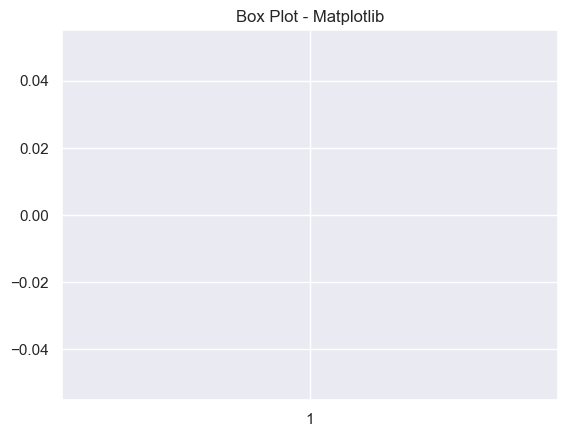

In [13]:
plt.boxplot(df['TotalCharges'])
plt.title("Box Plot - Matplotlib")
plt.show()

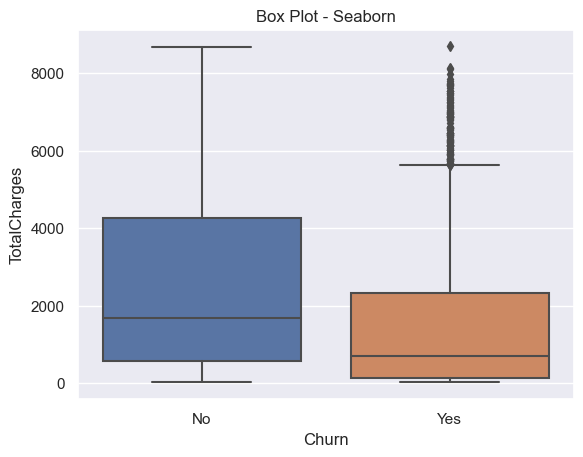

In [14]:
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Box Plot - Seaborn")
plt.show()


In [15]:
fig = px.box(df, x="Churn", y="TotalCharges", title="Box Plot - Plotly Express")
fig.show()


In [16]:
# Filling null value by using SimpleImputer

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')

df[['TotalCharges']] = imputer.fit_transform(df[['TotalCharges']])

In [17]:
df['TotalCharges'].isnull().sum()

0

### Remove unwanted columns

In [18]:
df.shape

(7043, 25)

In [19]:
df.head()

Unnamed: 0  customerID  gender SeniorCitizen          Partner  \
0           0  7590-VHVEG  Female        Junior     With Partner   
1           1  5575-GNVDE    Male        Junior  Without Partner   
2           2  3668-QPYBK    Male        Junior  Without Partner   
3           3  7795-CFOCW    Male        Junior  Without Partner   
4           4  9237-HQITU  Female        Junior  Without Partner   

           Dependents  tenure PhoneService     MultipleLines InternetService  \
0  Without Dependents       1           No  No phone service             DSL   
1  Without Dependents      34          Yes                No             DSL   
2  Without Dependents       2          Yes                No             DSL   
3  Without Dependents      45           No  No phone service             DSL   
4  Without Dependents       2          Yes                No     Fiber optic   

   ... StreamingMovies        Contract   PaperlessBilling  \
0  ...              No  Month-to-month  Paperless Billing   
1  ...              No        One year      Paper Billing   
2  ...              No  Month-to-month  Paperless Billing   
3  ...              No        One year      Paper Billing   
4  ...              No  Month-to-month  Paperless Billing   

               PaymentMethod MonthlyCharges TotalCharges Churn  \
0           Electronic check          29.85        29.85    No   
1               Mailed check          56.95      1889.50    No   
2               Mailed check          53.85       108.15   Yes   
3  Bank transfer (automatic)          42.30      1840.75    No   
4           Electronic check          70.70       151.65   Yes   

  MonthlyChargesGroup No. of Services              PartnerDependents  
0   B. 20 => 30 Euros               1              With Partner only  
1   E. 50 => 60 Euros               2  Without Partner or Dependents  
2   E. 50 => 60 Euros               2  Without Partner or Dependents  
3   D. 40 => 50 Euros               3  Without Partner or Dependents  
4   G. 70 => 80 Euros               0  Without Partner or Dependents  

[5 rows x 25 columns]

In [20]:
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MonthlyChargesGroup', 'No. of Services', 'PartnerDependents'],
      dtype='object')

In [21]:
df = df.drop(['Unnamed: 0', 'MonthlyChargesGroup', 'No. of Services', 'PartnerDependents'], axis=1)

In [22]:
df.shape

(7043, 21)

### Encode categorical variables

In [23]:
df.head()

customerID  gender SeniorCitizen          Partner          Dependents  \
0  7590-VHVEG  Female        Junior     With Partner  Without Dependents   
1  5575-GNVDE    Male        Junior  Without Partner  Without Dependents   
2  3668-QPYBK    Male        Junior  Without Partner  Without Dependents   
3  7795-CFOCW    Male        Junior  Without Partner  Without Dependents   
4  9237-HQITU  Female        Junior  Without Partner  Without Dependents   

   tenure PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0       1           No  No phone service             DSL             No  ...   
1      34          Yes                No             DSL            Yes  ...   
2       2          Yes                No             DSL            Yes  ...   
3      45           No  No phone service             DSL            Yes  ...   
4       2          Yes                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

    PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0  Paperless Billing           Electronic check          29.85         29.85   
1      Paper Billing               Mailed check          56.95       1889.50   
2  Paperless Billing               Mailed check          53.85        108.15   
3      Paper Billing  Bank transfer (automatic)          42.30       1840.75   
4  Paperless Billing           Electronic check          70.70        151.65   

   Churn  
0     No  
1     No  
2    Yes  
3     No  
4    Yes  

[5 rows x 21 columns]

In [24]:
df.SeniorCitizen.unique()

array(['Junior', 'Senior'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['SeniorCitizen'] = le.fit_transform(df['SeniorCitizen'])


In [26]:
df.head()

customerID  gender  SeniorCitizen          Partner          Dependents  \
0  7590-VHVEG  Female              0     With Partner  Without Dependents   
1  5575-GNVDE    Male              0  Without Partner  Without Dependents   
2  3668-QPYBK    Male              0  Without Partner  Without Dependents   
3  7795-CFOCW    Male              0  Without Partner  Without Dependents   
4  9237-HQITU  Female              0  Without Partner  Without Dependents   

   tenure PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0       1           No  No phone service             DSL             No  ...   
1      34          Yes                No             DSL            Yes  ...   
2       2          Yes                No             DSL            Yes  ...   
3      45           No  No phone service             DSL            Yes  ...   
4       2          Yes                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

    PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0  Paperless Billing           Electronic check          29.85         29.85   
1      Paper Billing               Mailed check          56.95       1889.50   
2  Paperless Billing               Mailed check          53.85        108.15   
3      Paper Billing  Bank transfer (automatic)          42.30       1840.75   
4  Paperless Billing           Electronic check          70.70        151.65   

   Churn  
0     No  
1     No  
2    Yes  
3     No  
4    Yes  

[5 rows x 21 columns]

In [27]:
df.SeniorCitizen.unique()

array([0, 1])

In [29]:
print("Unique values : ",df['Partner'].unique())
print("Unique values : ",df['Dependents'].unique())
print("Unique values : ",df['PaperlessBilling'].unique())

Unique values :  ['With Partner' 'Without Partner']
Unique values :  ['Without Dependents' 'With Dependents']
Unique values :  ['Paperless Billing' 'Paper Billing']


In [30]:
df['Partner']    = df['Partner'].replace({'With Partner': 'Yes', 'Without Partner': 'No'})
df['Dependents'] = df['Dependents'].replace({'With Dependents': 'Yes', 'Without Dependents': 'No'})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Paperless Billing': 'Yes', 'Paper Billing': 'No'})


In [31]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [53]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges    Churn_Num  \
count    7043.000000  7043.000000     7043.000000   7043.000000  7043.000000   
mean        0.162147    32.371149       64.761692   2283.300441     0.265370   
std         0.368612    24.559481       30.090047   2265.000258     0.441561   
min         0.000000     0.000000       18.250000     18.800000     0.000000   
25%         0.000000     9.000000       35.500000    402.225000     0.000000   
50%         0.000000    29.000000       70.350000   1400.550000     0.000000   
75%         0.000000    55.000000       89.850000   3786.600000     1.000000   
max         1.000000    72.000000      118.750000   8684.800000     1.000000   

           Cluster  
count  7043.000000  
mean      0.926168  
std       0.825916  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max       2.000000

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int32  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 3. Exploratory Data Analysis (EDA)

In [32]:
sns.set(color_codes=True)

In [33]:
sns.set_palette('pastel') 

### 1. Visualize SeniorCitizen

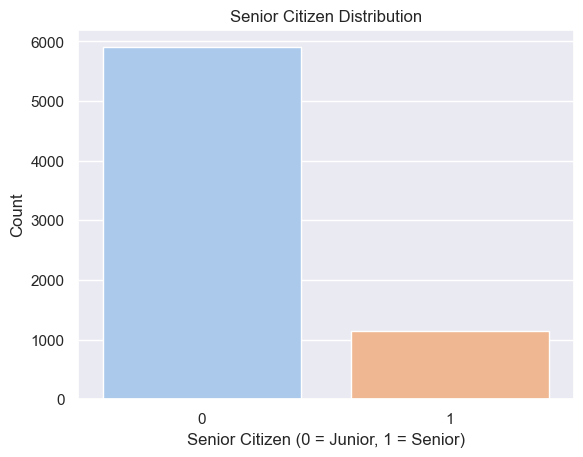

In [34]:
sns.countplot(x='SeniorCitizen', data=df)
plt.title('Senior Citizen Distribution')
plt.xlabel('Senior Citizen (0 = Junior, 1 = Senior)')
plt.ylabel('Count')
plt.show()


### 2. Visualize Tenure 

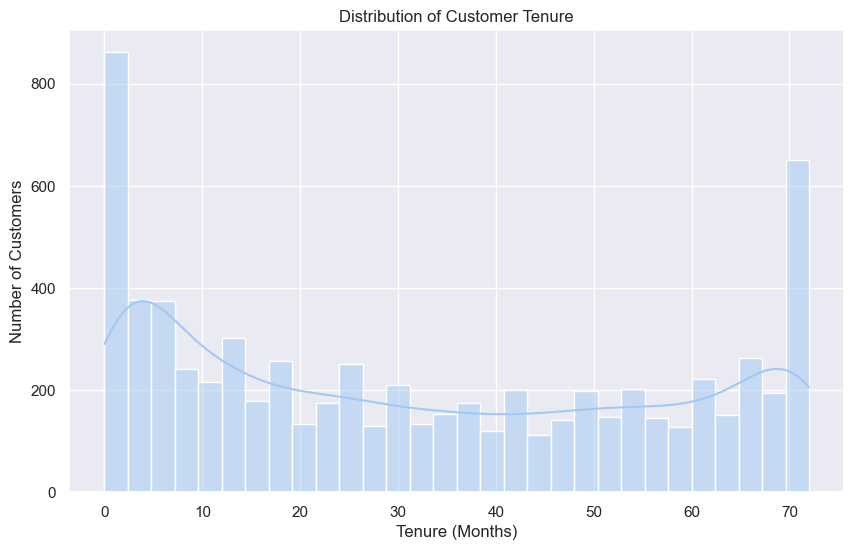

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()


### 3. Visualize Services Used (Internet Service, Phone Service, etc.)

In [37]:
services = ['PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']

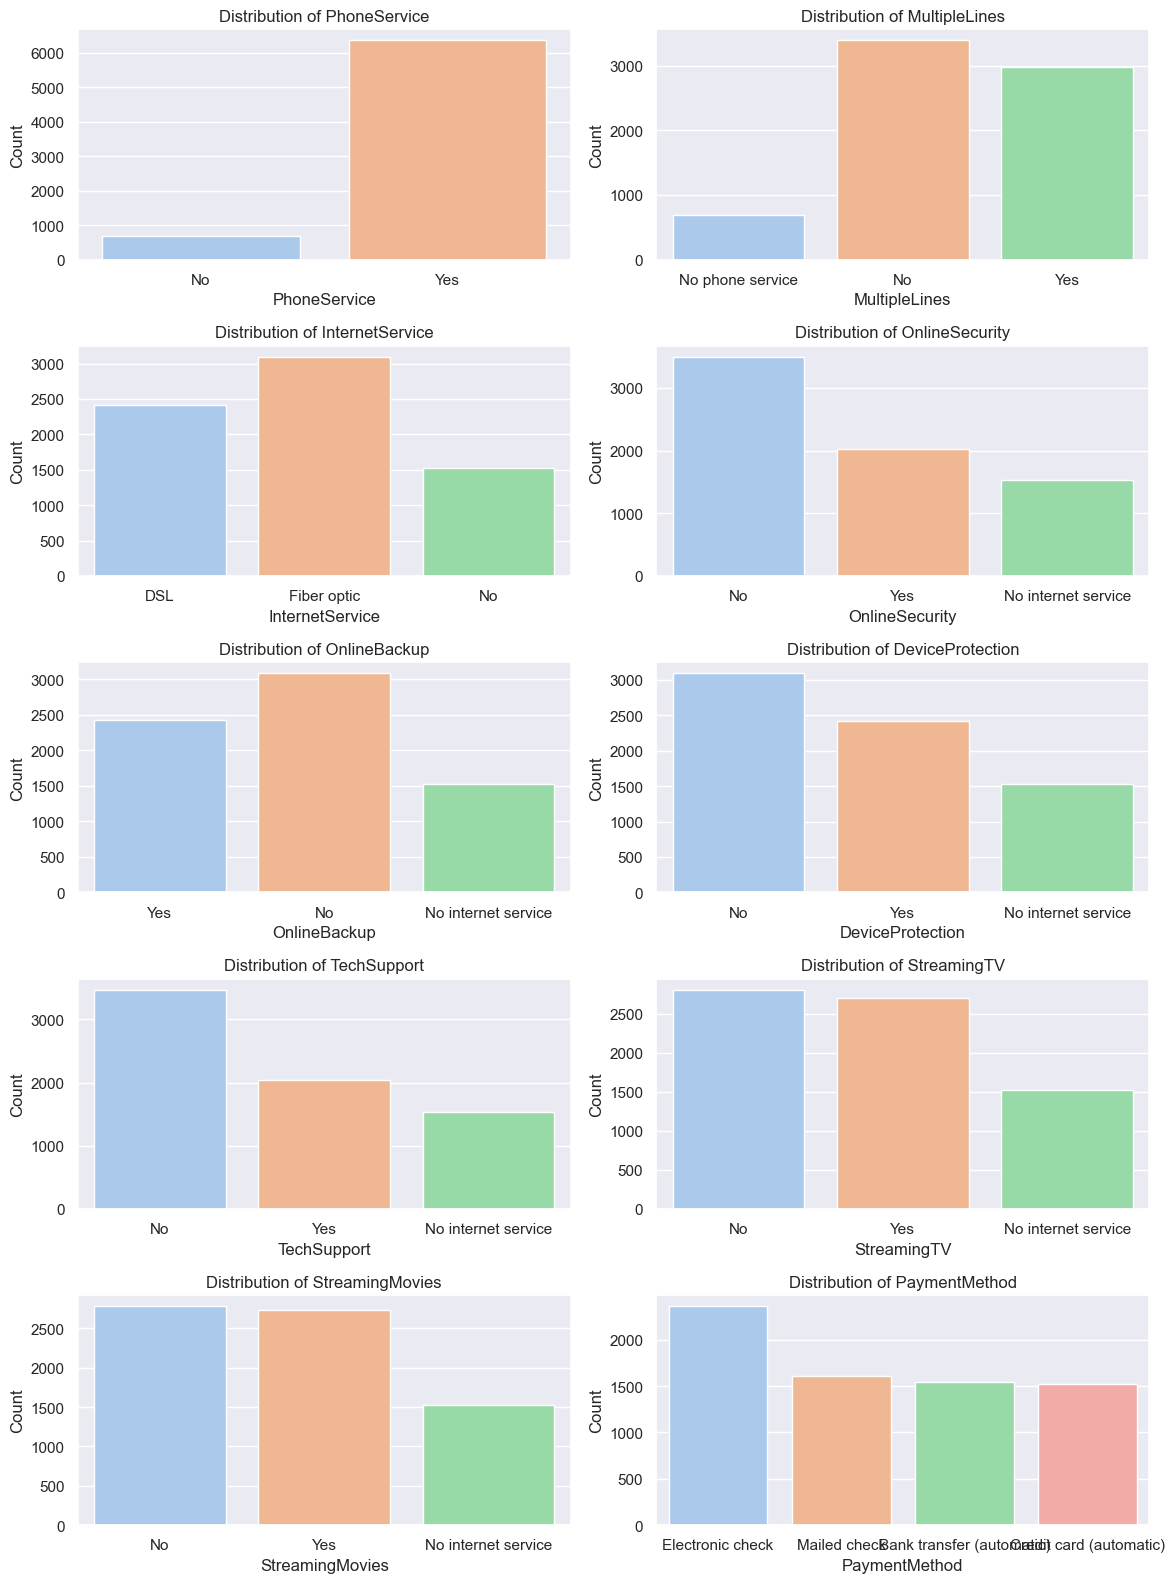

In [40]:
plt.figure(figsize=(12,16))

for i, col in enumerate(services, 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


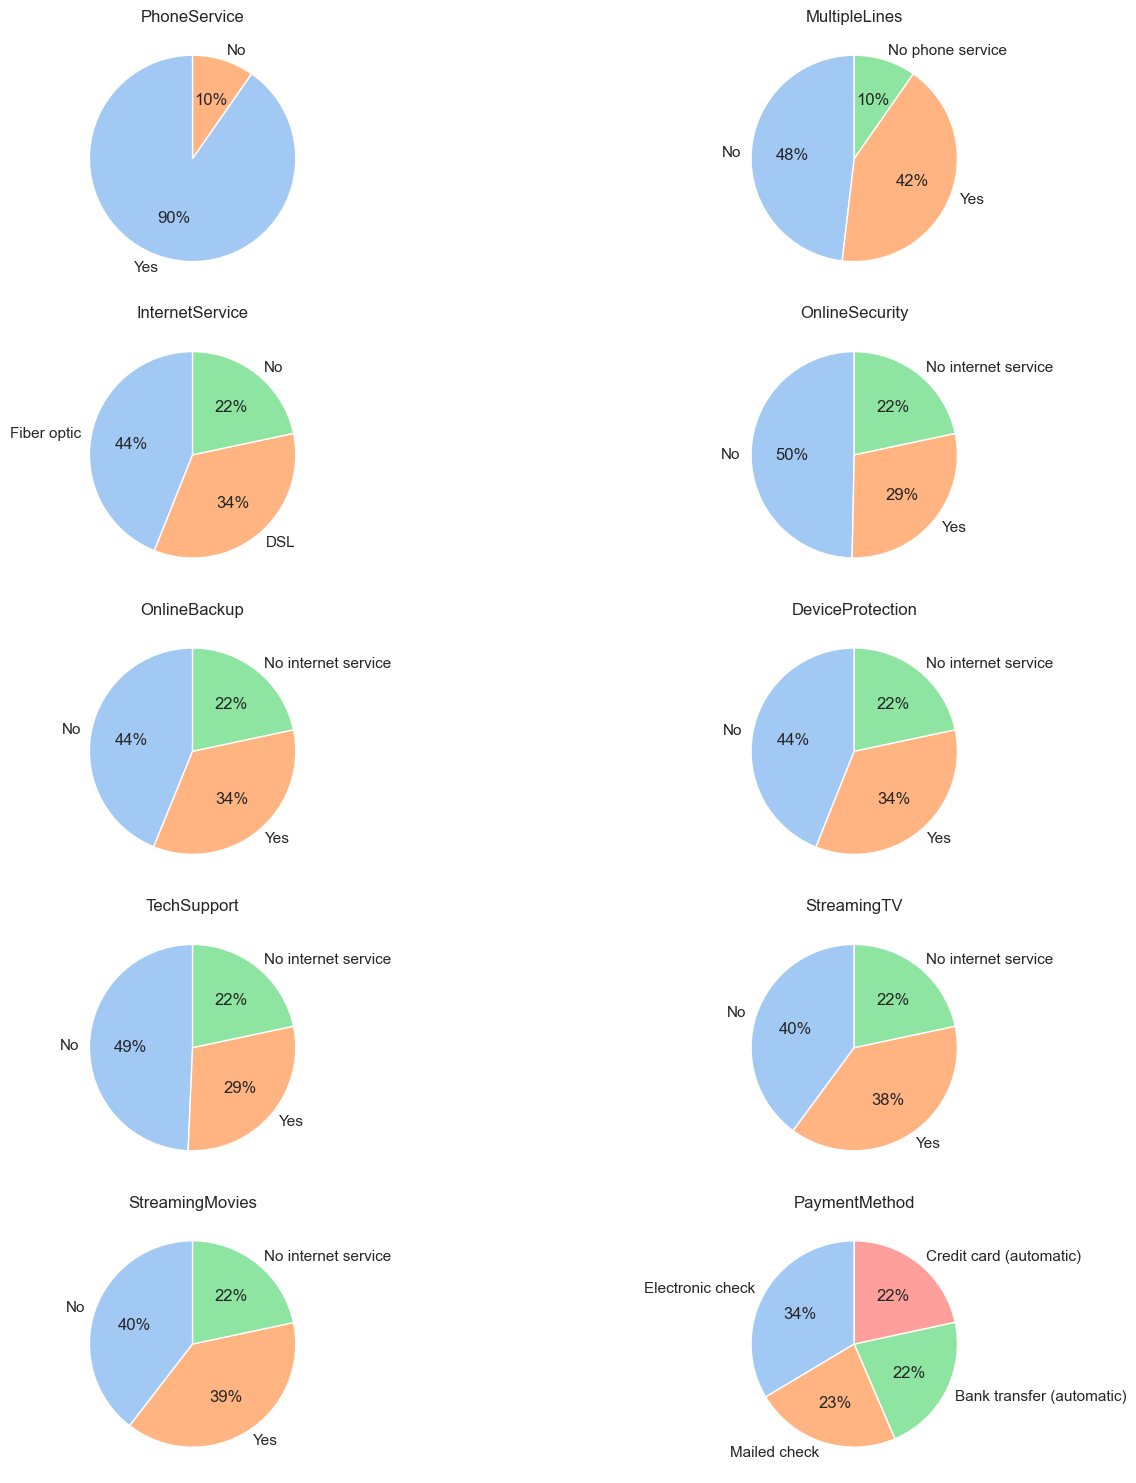

In [41]:
plt.figure(figsize=(15, 15)) 

for i, col in enumerate(services, 1):
    plt.subplot(5, 2, i) 
    df[col].value_counts().plot.pie(autopct="%1.0f%%", startangle=90)
    plt.title(col)
    plt.ylabel('')  

plt.tight_layout()
plt.show()


### Identify correlations between features and churn

**Correlation between numerical features and Churn**

In [42]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']


df['Churn_Num'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Correlation with Churn
correlation = df[numerical_cols + ['Churn_Num']].corr()


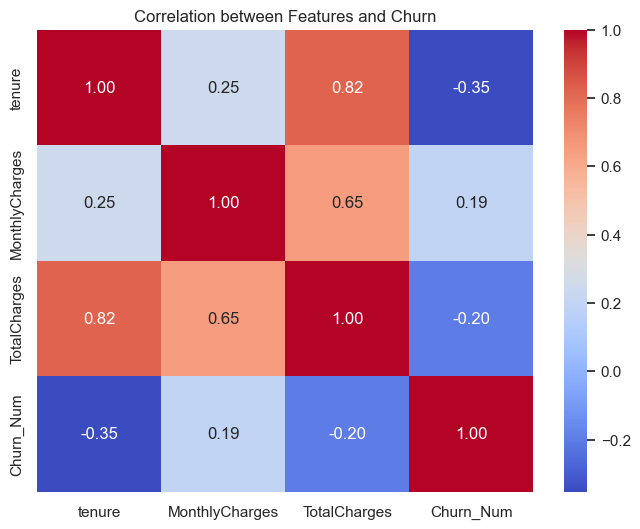

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Features and Churn")
plt.show()

### Categorical Features and Churn

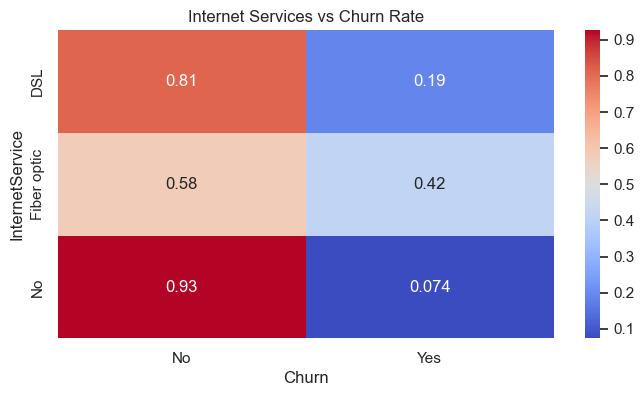

In [45]:
internet_churn = df.groupby(['InternetService'])['Churn'].value_counts(normalize=True).unstack()

plt.figure(figsize=(8, 4))
sns.heatmap(internet_churn, annot=True, cmap='coolwarm')
plt.title('Internet Services vs Churn Rate')
plt.show()

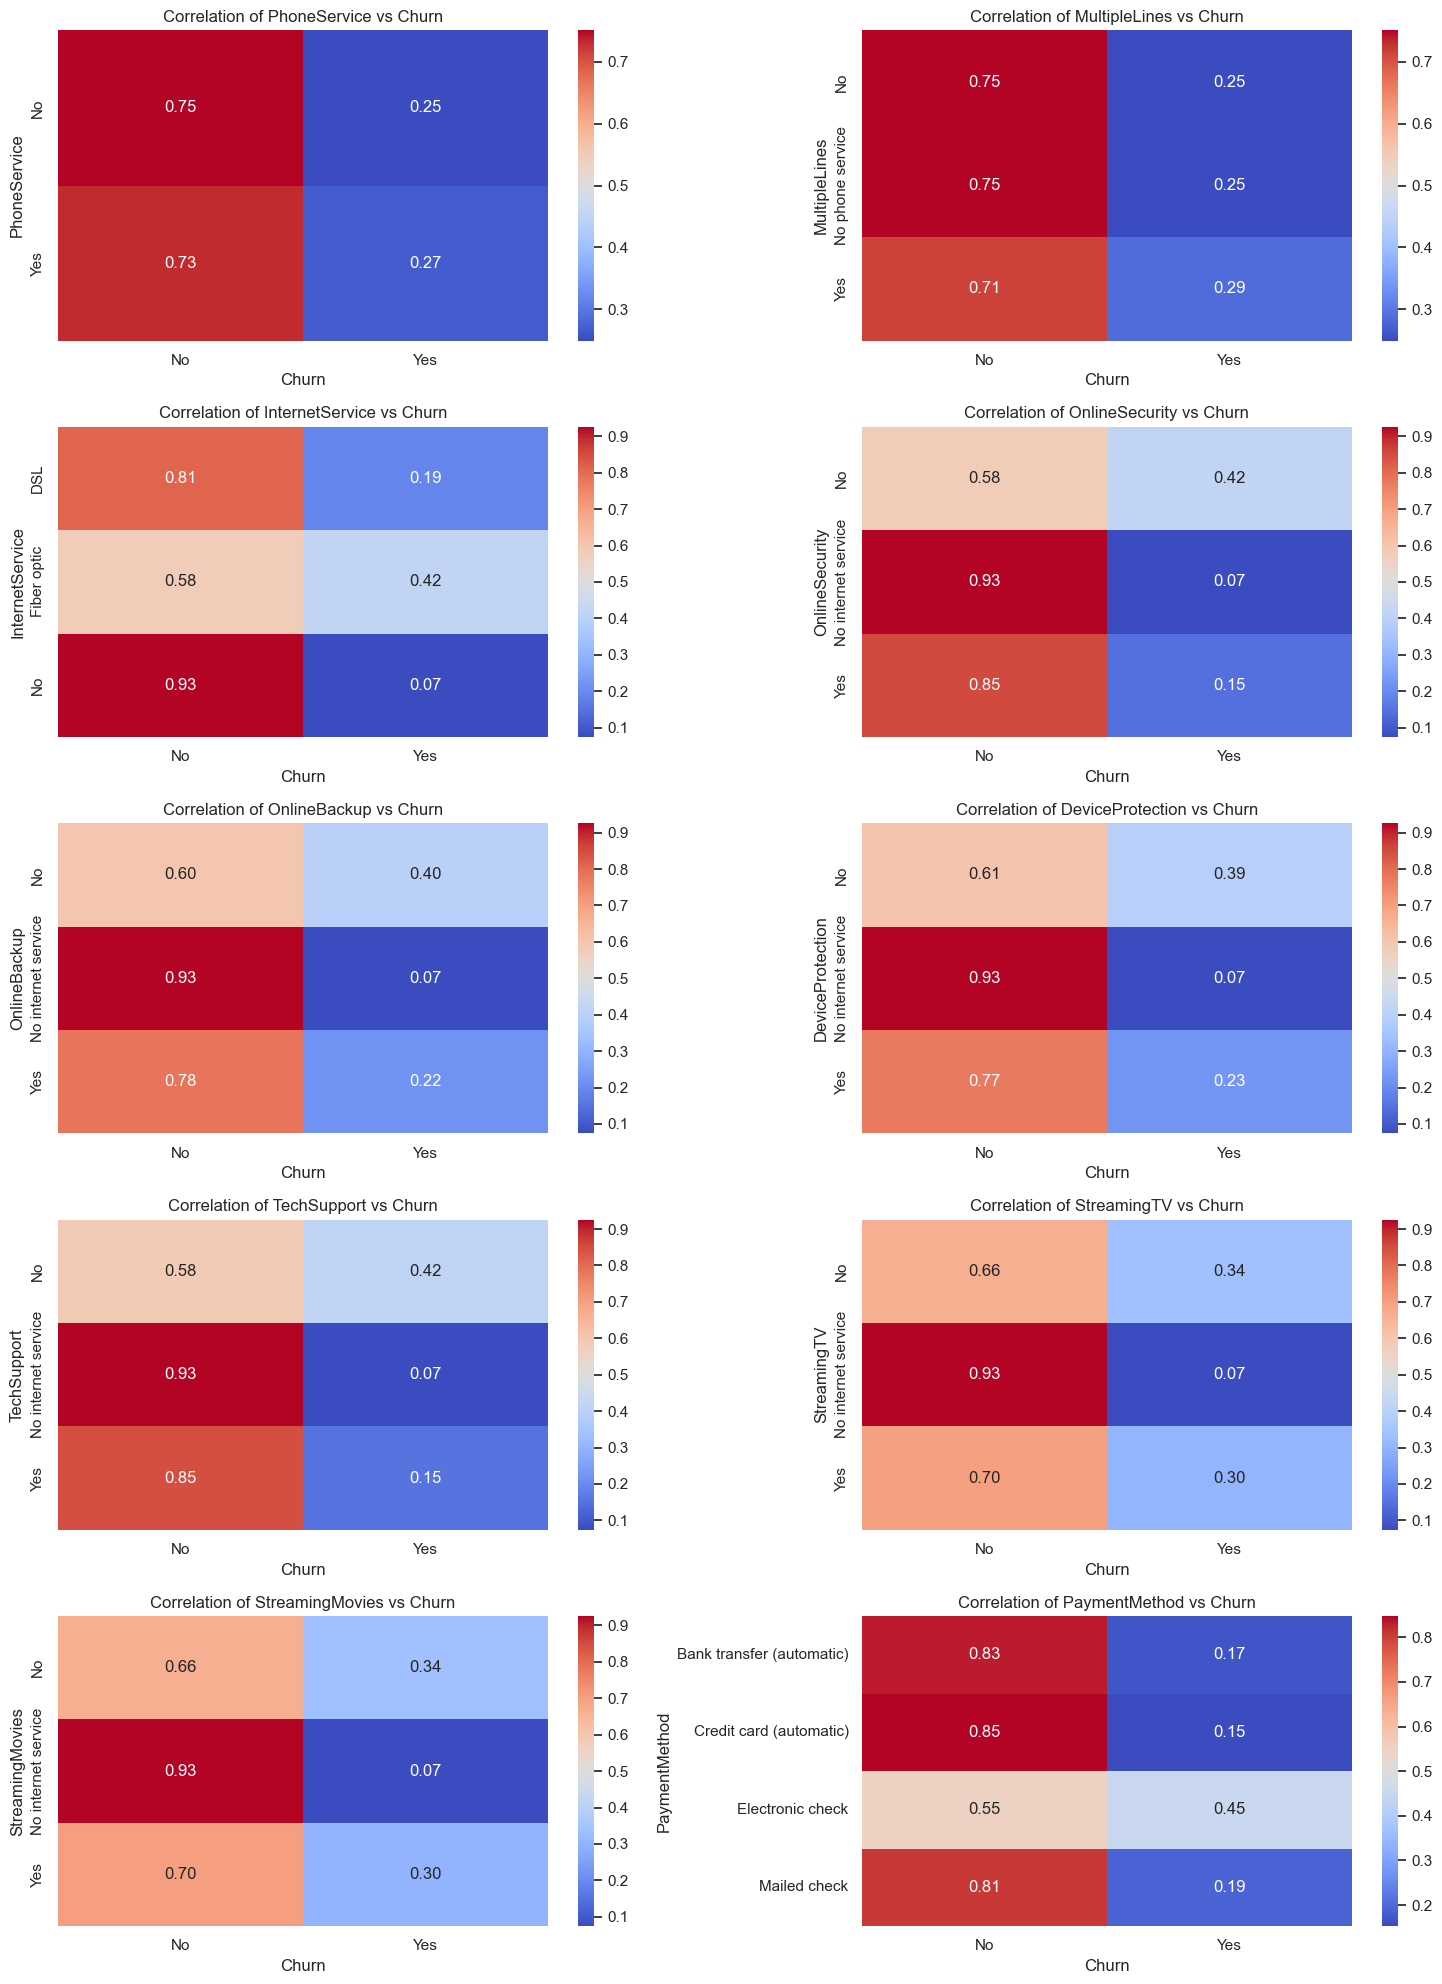

In [46]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']

plt.figure(figsize=(15, 20))  

for i, col in enumerate(services, 1):
    internet_churn = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    plt.subplot(5, 2, i)
    sns.heatmap(internet_churn, annot=True, cmap='coolwarm', fmt='.2f') 
    plt.title(f'Correlation of {col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


### Segment customer base using clustering 

In [47]:
# Features for clustering

clustering_features = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

scaled_features.head()

**Checking the Churn Rate**

In [58]:
churn = (sum(df['Churn_Num'])/len(df['Churn_Num'].index))*100
churn

26.536987079369588

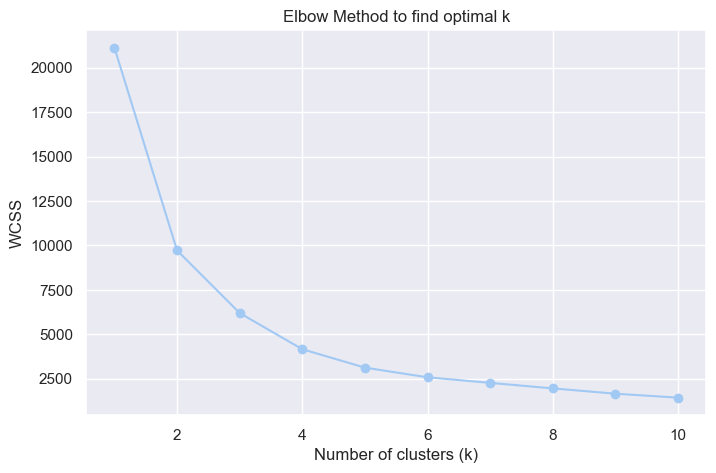

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Find the best number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method to find optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [50]:
# Apply KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


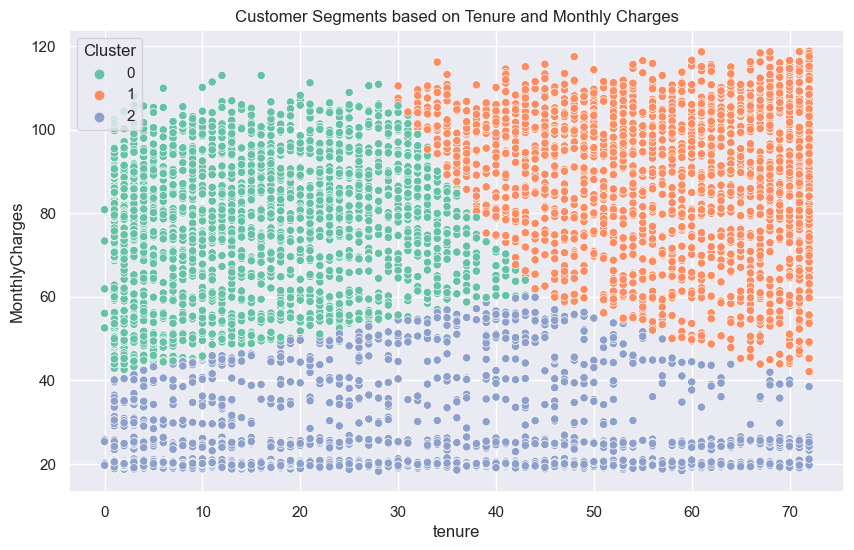

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Cluster', palette='Set2')
plt.title('Customer Segments based on Tenure and Monthly Charges')
plt.show()


# 4. Predictive Modeling

### Split data into train/test

In [61]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X and y
X = df.drop(['Churn', 'customerID'], axis=1)  
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')


Train shape: (4930, 21)
Test shape: (2113, 21)


### Train models to predict churn 

In [62]:
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Logistic Regression**

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict
y_pred_logreg = log_reg.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1036
         Yes       1.00      1.00      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



**Decision Tree Classifier**

In [64]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict
y_pred_dtree = dtree.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))


Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1036
         Yes       1.00      1.00      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



**Random Forest Classifier**

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1036
         Yes       1.00      1.00      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



**Compare Model Performances**

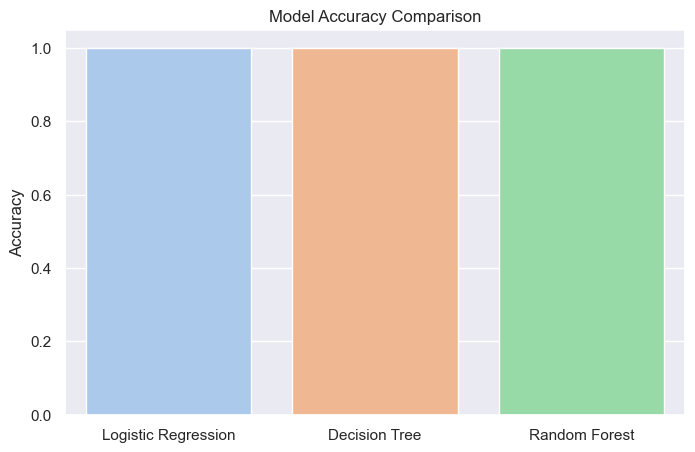

In [76]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_logreg),
              accuracy_score(y_test, y_pred_dtree),
              accuracy_score(y_test, y_pred_rf)]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


### Evaluate models using accuracy, F1-score, ROC AUC

In [67]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc


**Logistic Regression Evaluation**

In [68]:
# Predict probabilities for ROC AUC
y_proba_logreg = log_reg.predict_proba(X_test)[:, 1]

# Accuracy
acc_logreg = accuracy_score(y_test, y_pred_logreg)

# F1 Score
f1_logreg = f1_score(y_test, y_pred_logreg, pos_label='Yes')

# ROC AUC
roc_auc_logreg = roc_auc_score(y_test.map({'No': 0, 'Yes': 1}), y_proba_logreg)

print("Logistic Regression:")
print(f"Accuracy: {acc_logreg:.2f}")
print(f"F1 Score: {f1_logreg:.2f}")
print(f"ROC AUC: {roc_auc_logreg:.2f}")
print("-" * 30)


Logistic Regression:
Accuracy: 1.00
F1 Score: 1.00
ROC AUC: 1.00
------------------------------


**Decision Tree Evaluation**

In [69]:
# Predict probabilities
y_proba_dtree = dtree.predict_proba(X_test)[:, 1]

acc_dtree = accuracy_score(y_test, y_pred_dtree)
f1_dtree = f1_score(y_test, y_pred_dtree, pos_label='Yes')
roc_auc_dtree = roc_auc_score(y_test.map({'No': 0, 'Yes': 1}), y_proba_dtree)

print("Decision Tree:")
print(f"Accuracy: {acc_dtree:.2f}")
print(f"F1 Score: {f1_dtree:.2f}")
print(f"ROC AUC: {roc_auc_dtree:.2f}")
print("-" * 30)


Decision Tree:
Accuracy: 1.00
F1 Score: 1.00
ROC AUC: 1.00
------------------------------


**Random Forest Evaluation**

In [70]:
# Predict probabilities
y_proba_rf = rf.predict_proba(X_test)[:, 1]

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, pos_label='Yes')
roc_auc_rf = roc_auc_score(y_test.map({'No': 0, 'Yes': 1}), y_proba_rf)

print("Random Forest:")
print(f"Accuracy: {acc_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"ROC AUC: {roc_auc_rf:.2f}")
print("-" * 30)


Random Forest:
Accuracy: 1.00
F1 Score: 1.00
ROC AUC: 1.00
------------------------------


**Plot ROC Curve for all models**

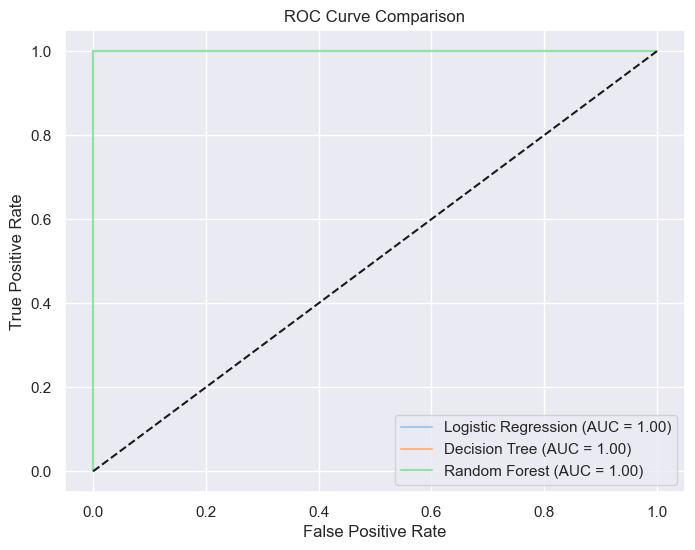

In [71]:
plt.figure(figsize=(8,6))

# ROC Curve
fpr1, tpr1, _ = roc_curve(y_test.map({'No':0,'Yes':1}), y_proba_logreg)
fpr2, tpr2, _ = roc_curve(y_test.map({'No':0,'Yes':1}), y_proba_dtree)
fpr3, tpr3, _ = roc_curve(y_test.map({'No':0,'Yes':1}), y_proba_rf)

plt.plot(fpr1, tpr1, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr2, tpr2, label=f'Decision Tree (AUC = {roc_auc_dtree:.2f})')
plt.plot(fpr3, tpr3, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

plt.plot([0,1],[0,1],'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


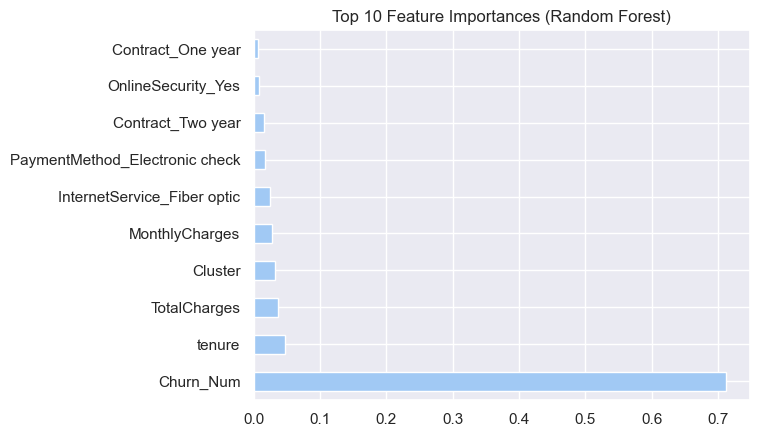

In [73]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()